In [1]:
import pymol
from pymol import cmd, stored
import matplotlib
from matplotlib import cm
import sys

In [2]:
def open_or_fetch(PDB_ID_or_filename, object_name=None):
    if len(PDB_ID_or_filename) in [4,5] and '.' not in PDB_ID_or_filename:
        cmd.fetch(PDB_ID_or_filename, async=0)
    else:
        if not object_name:
            object_name = PDB_ID_or_filename
        cmd.load(PDB_ID_or_filename, object_name)
        
def save_session(filename_pse='test.pse', pymol_viewer_version='1.72'):
    cmd.set('pse_export_version', pymol_viewer_version)
    cmd.save(filename_pse)

def white_and_beautiful(representation='cartoon'):
    cmd.hide('lines', 'all')
    cmd.show(representation, 'all')
    cmd.select('waters', 'name o')
    cmd.hide('everything', 'waters')
    cmd.color('white', 'all')
    cmd.set('bg_rgb', '(1,1,1)')
    cmd.set('surface_quality', '1')
    cmd.set('transparency', '0.5')
    
def prepare_GFP_2WUR():
    cmd.fetch('2WUR', async=0)
    white_and_beautiful()
    cmd.select('waters', 'name o')
    cmd.select('chr', 'resn GYS')
    cmd.select('aa_64_68', 'resi 64+68')
    cmd.select('aa_64_68_mainchain', 'aa_64_68 and name C+CO+CA+N')
    cmd.hide('everything', 'waters')
    cmd.show('sticks', 'chr')
    cmd.color('green', 'chr')
    cmd.show('sticks', 'aa_64_68_mainchain')
    
def color_positions(positions, values=None, representation='spheres', colormap=matplotlib.cm.cool, constant_color=120):
    # only positive values
    if type(constant_color) == int or type(constant_color) == float:
        color = colormap(constant_color)
    elif type(constant_color) == str:
        color = mpl.colors.hex2color(constant_color)
    elif type(constant_color) == tuple:
        color = constant_color
    else:
        print 'Weird color!'

    if str(values) != 'None':
        values = 1. * np.array(values) / max(values)
    for index, position in enumerate(positions):
        if str(values) != 'None':
            color=colormap(values[index])
        colorName = "color_" + str(position)
        selName = "temp_selection"
        cmd.set_color(colorName, color[0:3])
        cmd.select(selName, 'resi %s' %position)
        cmd.show(representation, selName)
        cmd.color(colorName, selName)
        
def get_residues_from_selection(selection_name, only_numbers=True):
    stored.list=[]
    if only_numbers:
        cmd.iterate("(%s & n. ca)" %selection_name, "stored.list.append(resi)")
        return [int(resi) for resi in stored.list]
    else:
        cmd.iterate("(%s & n. ca)" %selection_name, "stored.list.append((resi, resn))")
        return [(int(resi), resn) for resi, resn in stored.list]
    
def save_session_properly(session_counter, title, folder, prefix):
    session_name = '%s_pse%s_%s.pse' %(prefix, image_counter.get_number(), '_'.join(title.split()))
    save_session(os.path.join(folder, session_name))

### PyMol games

In [3]:
pymol.pymol_argv = ['pymol', '-qc'] # quiet / no GUI
stdout = sys.stdout
stderr = sys.stderr
pymol.finish_launching(['pymol', '-xiq'])
sys.stdout = stdout
sys.stderr = stderr

/Users/karen/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


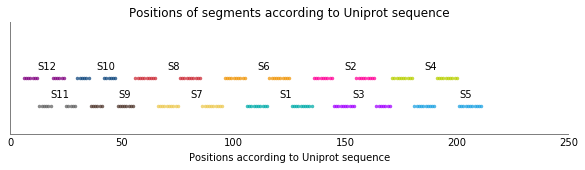

1891 unique mutations across all segments
There are 231 single mutations with known effects. They are found in 120 positions


/Users/karen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [4]:
%run 'ks01_Data_import.ipynb'
notebook_prefix = 'ks05'
image_counter = Counter()
session_counter = Counter()

#### Creating .pse files with every segment's positions

In [5]:
pdb_file = 'files_dump/structure_predictions/HIS3_saccharomyces_cerevisiae__itasser_model1_prediction.pdb'
pse_with_ligand = 'files_dump/structure_visualizations/HIS3_saccharomyces_cerevisiae__itasser_model1_prediction__aligned_with_4LOM_with_ligand_white_6A.pse'
object_name='his3_prediction'

In [6]:
for segment_name in positions.segment.values:
    title = 'Segment %s positions' %segment_name
    position_list = positions[positions.segment == segment_name].positions_Uniprot_P06633.values[0]
    cmd.reinitialize()
    open_or_fetch(pdb_file, object_name=object_name)
    white_and_beautiful()
    color_positions(position_list, constant_color=segment_colors[segment_name])
    save_session_properly(session_counter, title, pymol_sessions_folder, notebook_prefix)

 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility


#### Coloring segments positions by fitness of single mutants

In [8]:
for segment_name in positions.segment.values:
    title = 'Fitness of single mutants in segment %s' %segment_name
    position_list = positions[positions.segment == segment_name].positions_Uniprot_P06633.values[0]
    by_position = data_singles[segment_name + '_scaled'].groupby('position_Scer')['s'].agg(np.median)
    cmd.reinitialize()
    open_or_fetch(pdb_file, object_name=object_name)
    white_and_beautiful()
    color_positions(position_list, constant_color='#999999')
    color_positions(by_position.index, values=by_position.values)
    save_session_properly(session_counter, title, pymol_sessions_folder, notebook_prefix)

 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility


#### Coloring all positions by fitness of single mutants

In [9]:
title = 'Fitness of single mutants across all segments'
position_list = []
by_position = pd.Series(dtype=np.float)
for segment_name in positions.segment.values:
    position_list.extend(list(positions[positions.segment == segment_name].positions_Uniprot_P06633.values[0]))
    by_position_segment = data_singles[segment_name + '_scaled'].groupby('position_Scer')['s'].agg(np.median)
    by_position = by_position.append(by_position_segment, verify_integrity=True)
cmd.reinitialize()
open_or_fetch(pse_with_ligand)
# white_and_beautiful()
color_positions(position_list, constant_color='#999999')
color_positions(by_position.index, values=by_position.values)
save_session_properly(session_counter, title, pymol_sessions_folder, notebook_prefix)

 Applying pse_export_version=1.720 compatibility


#### Mutations in active site

In [10]:
title = 'Fitness of single mutants in active site'
cmd.reinitialize()
open_or_fetch(pse_with_ligand)
active_site = get_residues_from_selection('res_around_ligand_6A & HIS3_saccharomyces_cerevisiae__itasser_model1_prediction')
position_list = by_position.loc[active_site]
color_positions(position_list.index, constant_color='#999999')
color_positions(position_list[~np.isnan(position_list)].index, values=position_list[~np.isnan(position_list)].values)
save_session_properly(session_counter, title, pymol_sessions_folder, notebook_prefix)

 Applying pse_export_version=1.720 compatibility


In [19]:
doubles = OrderedDict()
for segment_name, segment_data in known_single_mutations.items():
    doubles[segment_name] = segment_data[segment_data.mut_number == 2]

AttributeError: 'list' object has no attribute 'items'

,aa_seq,t0_fr,t1_fr,t2_fr,t0_fr_var,t1_fr_var,t2_fr_var,size,y0,s,...,dist_node_37,dist_node_38,dist_node_39,dist_node_40,dist_node_41,dist_min_sp,dist_min_all,mut_list_Scer,mut_number,epistasis


,aa_seq,t0_fr,t1_fr,t2_fr,t0_fr_var,t1_fr_var,t2_fr_var,size,y0,s,...,dist_node_37,dist_node_38,dist_node_39,dist_node_40,dist_node_41,dist_min_sp,dist_min_all,mut_list_Scer,mut_number,epistasis


,aa_seq,t0_fr,t1_fr,t2_fr,t0_fr_var,t1_fr_var,t2_fr_var,size,y0,s,...,dist_node_37,dist_node_38,dist_node_39,dist_node_40,dist_node_41,dist_min_sp,dist_min_all,mut_list_Scer,mut_number,epistasis


,aa_seq,t0_fr,t1_fr,t2_fr,t0_fr_var,t1_fr_var,t2_fr_var,size,y0,s,...,dist_node_37,dist_node_38,dist_node_39,dist_node_40,dist_node_41,dist_min_sp,dist_min_all,mut_list_Scer,mut_number,epistasis


,aa_seq,t0_fr,t1_fr,t2_fr,t0_fr_var,t1_fr_var,t2_fr_var,size,y0,s,...,dist_node_37,dist_node_38,dist_node_39,dist_node_40,dist_node_41,dist_min_sp,dist_min_all,mut_list_Scer,mut_number,epistasis


,aa_seq,t0_fr,t1_fr,t2_fr,t0_fr_var,t1_fr_var,t2_fr_var,size,y0,s,...,dist_node_37,dist_node_38,dist_node_39,dist_node_40,dist_node_41,dist_min_sp,dist_min_all,mut_list_Scer,mut_number,epistasis


,aa_seq,t0_fr,t1_fr,t2_fr,t0_fr_var,t1_fr_var,t2_fr_var,size,y0,s,...,dist_node_37,dist_node_38,dist_node_39,dist_node_40,dist_node_41,dist_min_sp,dist_min_all,mut_list_Scer,mut_number,epistasis


,aa_seq,t0_fr,t1_fr,t2_fr,t0_fr_var,t1_fr_var,t2_fr_var,size,y0,s,...,dist_node_37,dist_node_38,dist_node_39,dist_node_40,dist_node_41,dist_min_sp,dist_min_all,mut_list_Scer,mut_number,epistasis


,aa_seq,t0_fr,t1_fr,t2_fr,t0_fr_var,t1_fr_var,t2_fr_var,size,y0,s,...,dist_node_37,dist_node_38,dist_node_39,dist_node_40,dist_node_41,dist_min_sp,dist_min_all,mut_list_Scer,mut_number,epistasis


,aa_seq,t0_fr,t1_fr,t2_fr,t0_fr_var,t1_fr_var,t2_fr_var,size,y0,s,...,dist_node_37,dist_node_38,dist_node_39,dist_node_40,dist_node_41,dist_min_sp,dist_min_all,mut_list_Scer,mut_number,epistasis


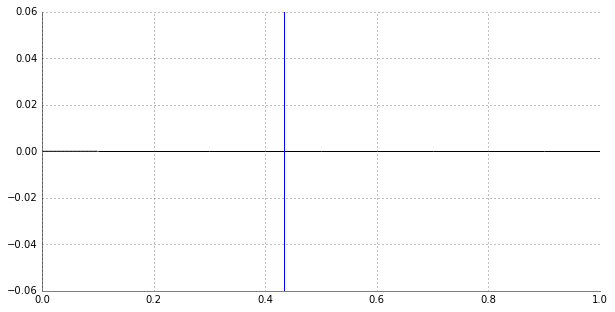

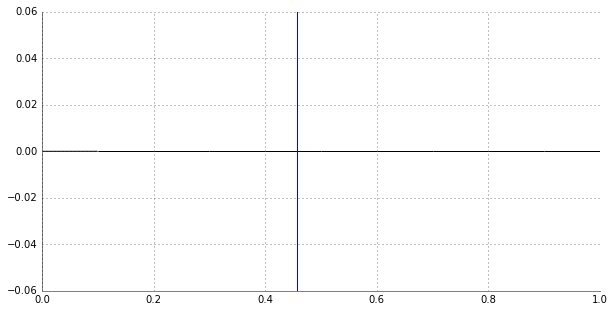

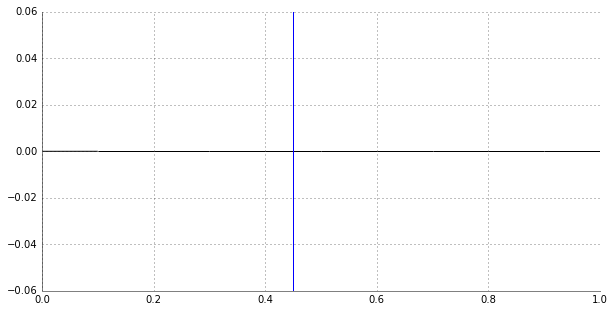

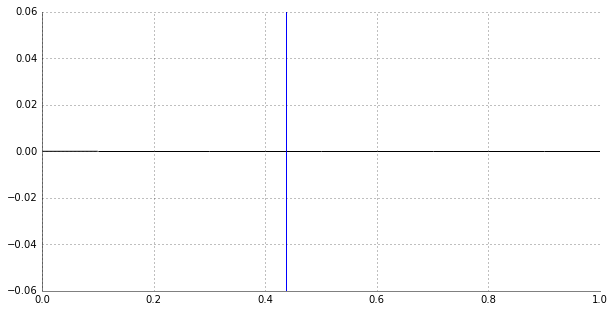

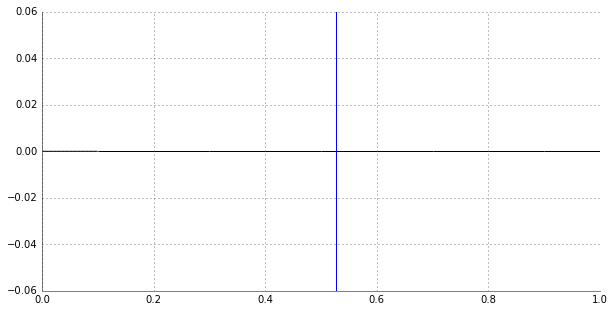

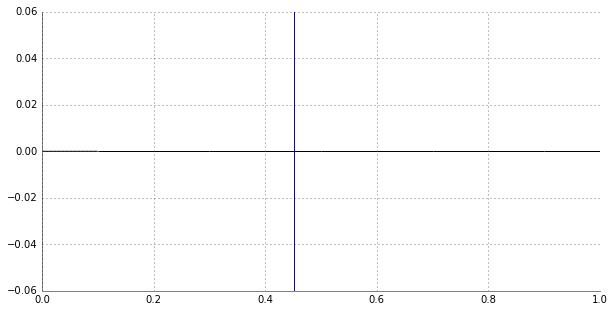

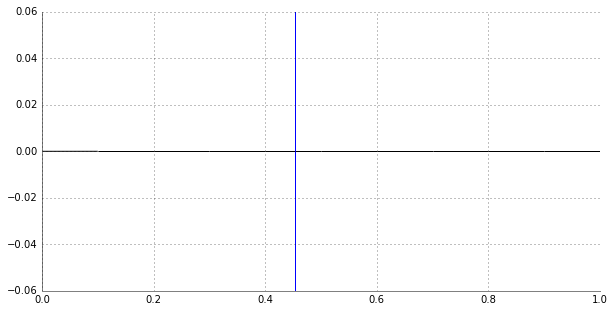

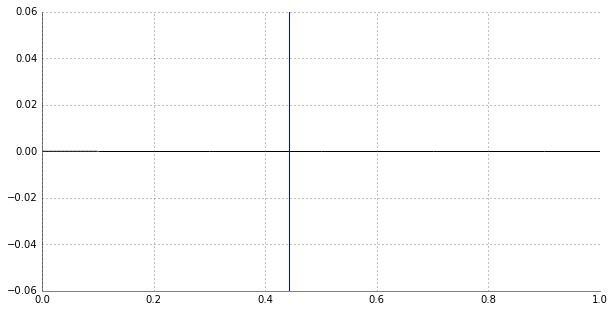

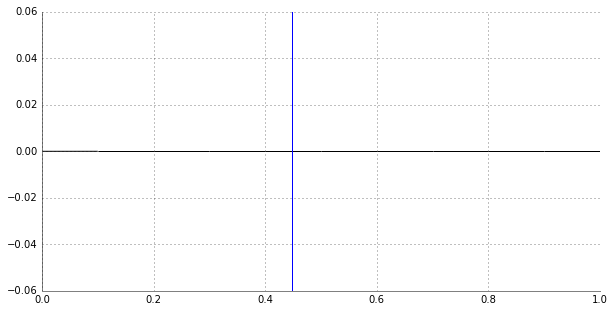

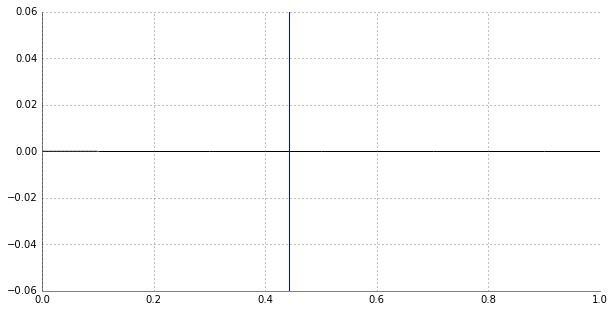

In [18]:
for segment_name, segment_data in known_single_mutations.items():
    doubles[segment_name] = segment_data[segment_data.mut_number == 2]
for m in single_mut_fitness_dict.keys()[:10]:
    all_doubles = segment_data[segment_data.mut_number == 2]
    doubles_with_mutation = all_doubles[all_doubles.mut_list_Scer.str.contains(m)]
    display(doubles_with_mutation)
    plot_better()
    plt.hist(doubles_with_mutation['s'].values)
    plt.axvline(single_mut_fitness_dict[m])